In [27]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,10]
plt.rcParams.update({'font.size':18})

**The below code is the question, where a clean signal is given and then noise is added to the clean signal. Both signals are then plotted. The objective of the assignment is to retrieve the clean signal from the noisy signal, using FFT.**

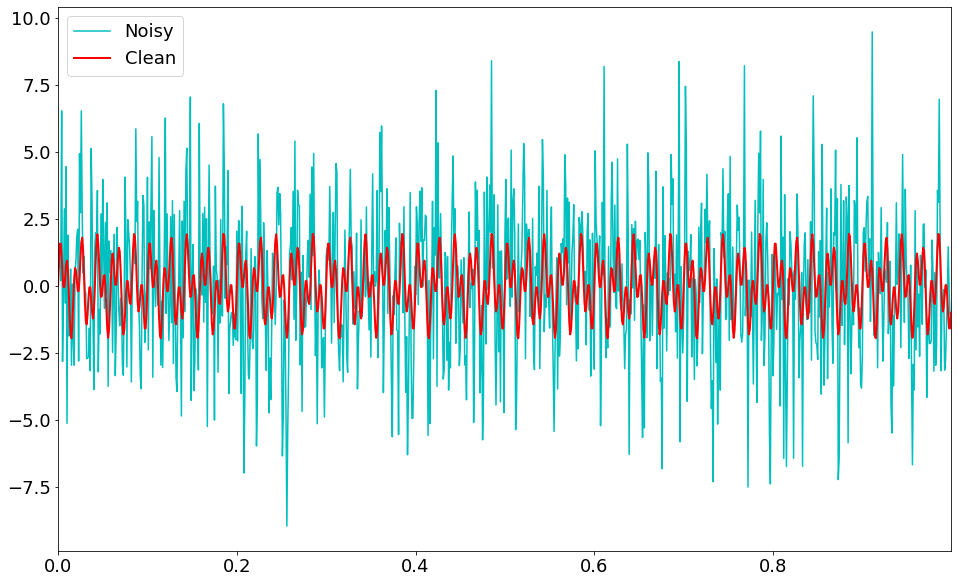

In [28]:
#create a simple signal with 2 frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_clean = f
f = f + 2.5*np.random.randn(len(t))

plt.plot(t,f,color = 'c' , LineWidth = 1.5, label = 'Noisy')
plt.plot(t,f_clean,color = 'r' , LineWidth = 2, label = 'Clean')
plt.xlim(t[0], t[-1])
plt.legend()

**The below code is computing the FFT of the input signal f using np.fft.fft(f, n). The input signal f is a 1D array of length n, and the FFT is an array of complex values with the same length.**

**Then, calculated the PSD of the signal by taking the product of the FFT and its complex conjugate, and then dividing by the length of the input signal n.**

**The PSD is a measure of the power of the signal as a function of frequency, and it is often used to analyze the frequency content of a signal.**

**This generates a frequency axis for the plot by scaling the indices of the FFT array by the sample rate dt and the length of the input signal n.**

**The indices, L to be used for the plot as the integers range from 1 to the floor of n divided by 2. This is done because the FFT array is symmetric, with the positive and negative frequencies being complex conjugates of each other, and we only want to plot the positive frequencies up to the Nyquist frequency.**


*Finally, the correspoding graph is plotted.*

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


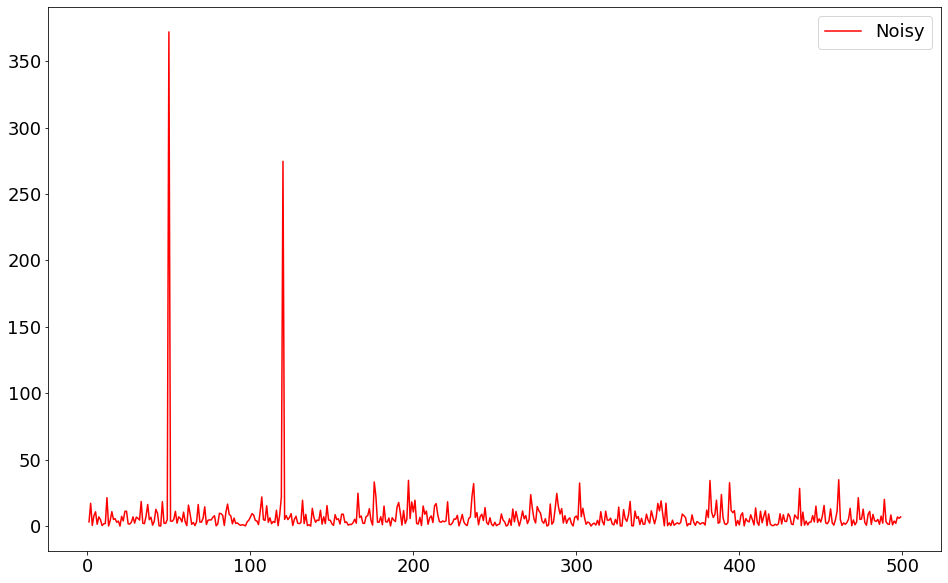

In [29]:
n = len(t)
fastfourtrans = np.fft.fft(f,n)                            
PSD = fastfourtrans * np.conj(fastfourtrans) / n
                                         
frequency_ = (1/(dt*n)) * np.arange(n)
                                            
L = np.arange(1,np.floor(n/2),dtype='int') 
plt.plot(frequency_[L],PSD[L],color='r',label='Noisy')

plt.legend()
plt.show()

**The below code sets the value of indices to a boolean array that is True for elements in PSD that are greater than 100 and False for elements that are less than or equal to 100. This is used to filter the noise out.**

**Then, the value of PSDclean is set to an array that is the element-wise product of PSD and indices. This has the effect of setting all elements in PSDclean that correspond to False elements in indices to 0.**

**A line plot of the data in the array PSDclean[L], with the values of frequency_[L] used as the x-coordinates is created to FILTER out all frequencies below 100**

**The fast fourier transform values are multiplied with the corresponding indices.**

**Finally, computing the inverse fast Fourier transform (IFFT) of fastfourtrans assigning the result to the variable ffilt.**

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


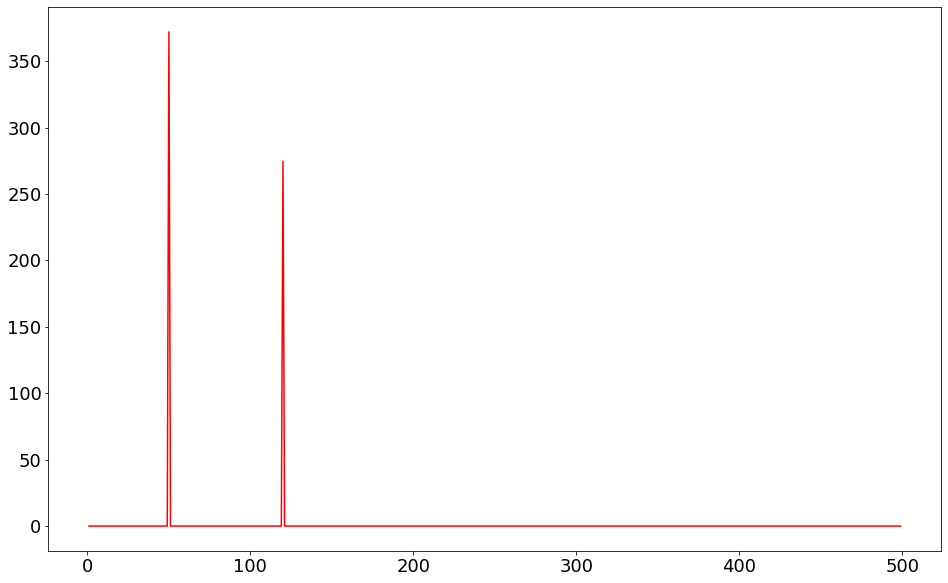

In [30]:
indices = PSD > 100 
PSDclean = PSD * indices 
plt.plot(frequency_[L],PSDclean[L],color='r',label='Noisy')
fastfourtrans = indices * fastfourtrans 
ffilt = np.fft.ifft(fastfourtrans) 

**The below code plots the line plot of the data in ffilt against time in the x axis.**

**The original signal is thus recovered fully.**

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


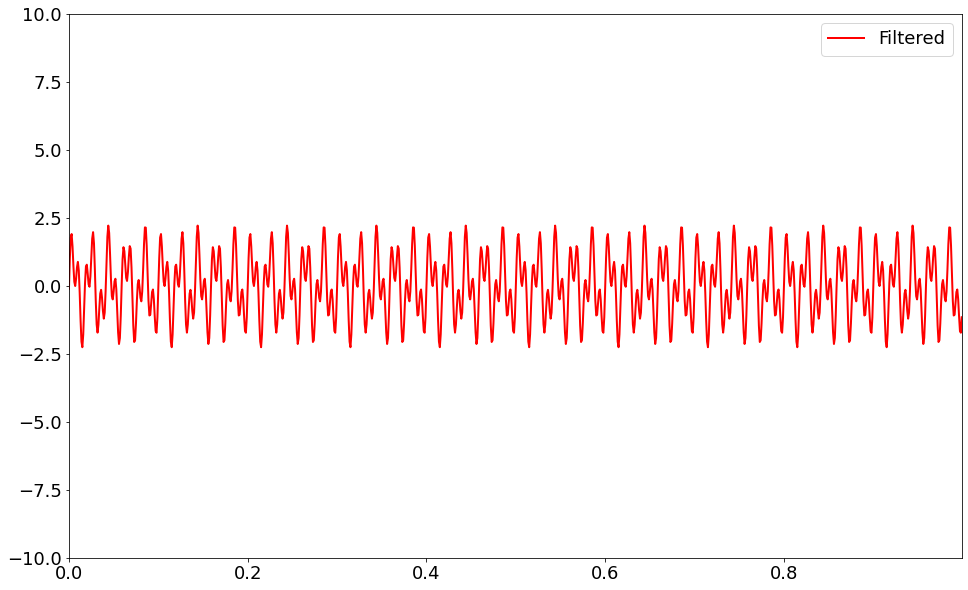

In [31]:
#Ploting the final signal after removing noise
plt.plot(t,ffilt,color='r',LineWidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.ylim(-10,10)
plt.legend()
plt.show()